In [1]:
! pip install --quiet vietocr

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

In [5]:
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [6]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [10]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [11]:
config = Cfg.load_config_from_name('vgg_transformer')

In [12]:
from sklearn.model_selection import train_test_split

# Đọc danh sách các mẫu từ file test annotation
test_file = './data_line/test_line_annotation.txt'
with open(test_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Chia tập test thành validation (20%) và test (80%)
val_lines, test_lines = train_test_split(lines, test_size=0.8, random_state=42)

# Ghi dữ liệu mới vào file
val_annotation_file = './data_line/valid_line_annotation.txt'
test_annotation_file = './data_line/test_line_annotation.txt'

with open(val_annotation_file, 'w', encoding='utf-8') as f:
    f.writelines(val_lines)

with open(test_annotation_file, 'w', encoding='utf-8') as f:
    f.writelines(test_lines)

# Cập nhật config dataset
dataset_params = {
    'name': 'hw',
    'data_root': './data_line/',
    'train_annotation': 'train_line_annotation.txt',
    'valid_annotation': 'valid_line_annotation.txt',  # Use 'valid_annotation' instead of 'val_annotation'
    'test_annotation': 'test_line_annotation.txt',  # Tập test mới
    'image_height': 32,
    'image_min_width': 32,
    'image_max_width': 525
}

# Cập nhật cấu hình
params = {
    'print_every': 200,
    'valid_every': 15 * 200,
    'iters': 20000,
    'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
    'export': './weights/transformerocr.pth',
    'metrics': 10000
}

# Ensure 'dataset' key exists in config before updating
if 'dataset' not in config:
    config['dataset'] = {}
config['dataset'].update(dataset_params)


# Ensure 'trainer' key exists in config before updating
if 'trainer' not in config:
    config['trainer'] = {}
config['trainer'].update(params)



config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [13]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'valid_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 3

You should train model from our pretrained

In [14]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:04<00:00, 123MB/s] 
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:03<00:00, 1381.14it/s]

Created dataset with 5482 samples



train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 167269.31it/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Create valid_hw: 100%|██████████████████████████████████████████| 362/362 [00:00<00:00, 1792.27it/s]

Created dataset with 361 samples



valid_hw build cluster: 100%|█████████████████████████████████| 361/361 [00:00<00:00, 110505.31it/s]


Save model configuration for inference, load_config_from_file

In [15]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

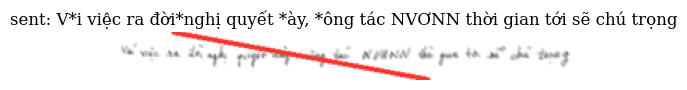

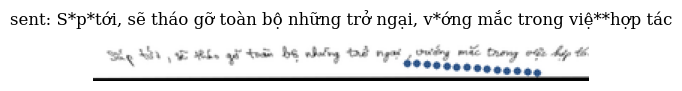

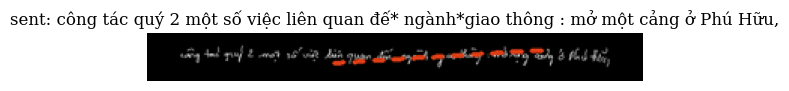

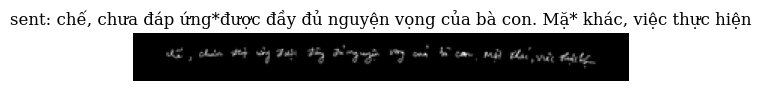

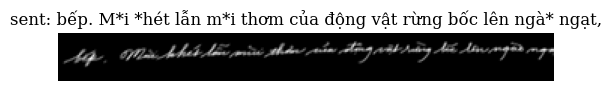

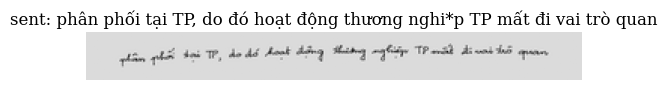

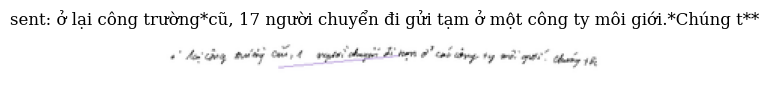

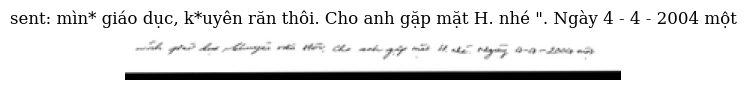

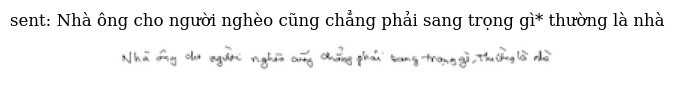

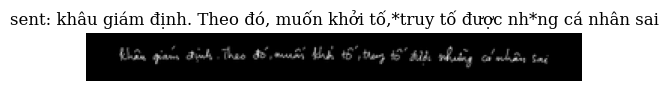

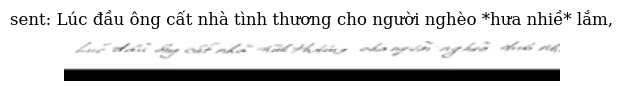

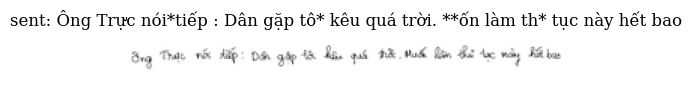

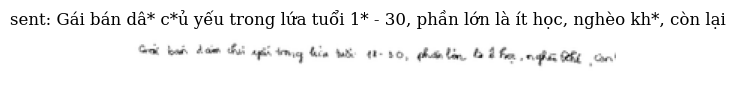

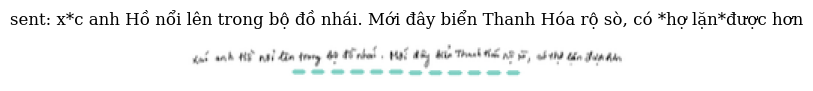

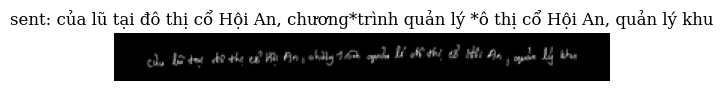

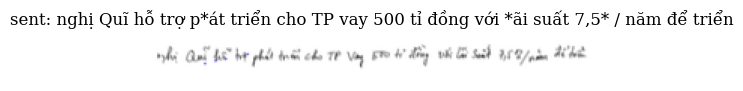

In [16]:
trainer.visualize_dataset()

Train now

In [17]:
trainer.train()

iter: 000200 - train loss: 1.625 - lr: 1.91e-05 - load time: 0.82 - gpu time: 78.82
iter: 000400 - train loss: 1.372 - lr: 3.95e-05 - load time: 0.64 - gpu time: 81.29
iter: 000600 - train loss: 1.246 - lr: 7.14e-05 - load time: 0.52 - gpu time: 80.41
iter: 000800 - train loss: 1.174 - lr: 1.12e-04 - load time: 1.01 - gpu time: 80.66
iter: 001000 - train loss: 1.120 - lr: 1.56e-04 - load time: 0.60 - gpu time: 80.67
iter: 001200 - train loss: 1.088 - lr: 2.01e-04 - load time: 0.57 - gpu time: 81.28
iter: 001400 - train loss: 1.042 - lr: 2.41e-04 - load time: 1.01 - gpu time: 80.66
iter: 001600 - train loss: 1.019 - lr: 2.73e-04 - load time: 0.75 - gpu time: 80.80
iter: 001800 - train loss: 0.999 - lr: 2.93e-04 - load time: 0.79 - gpu time: 80.82
iter: 002000 - train loss: 0.987 - lr: 3.00e-04 - load time: 0.53 - gpu time: 80.92
iter: 002200 - train loss: 0.967 - lr: 3.00e-04 - load time: 0.90 - gpu time: 80.51
iter: 002400 - train loss: 0.941 - lr: 3.00e-04 - load time: 0.56 - gpu time

Visualize prediction from our trained model


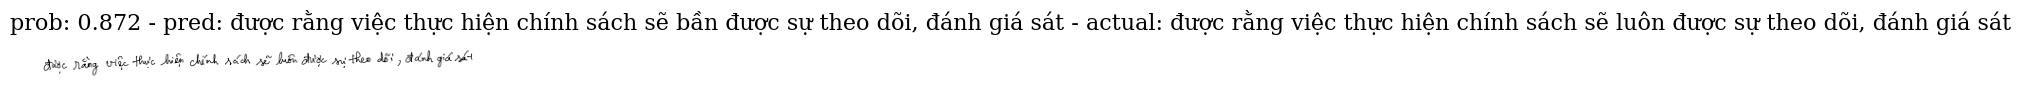

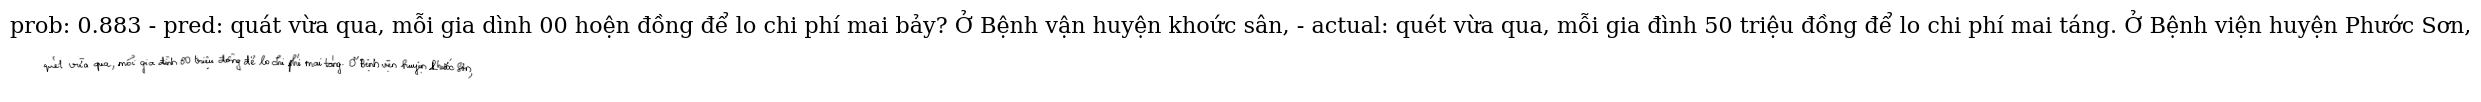

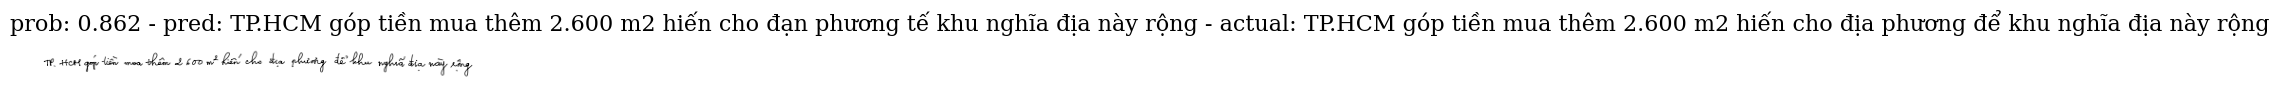

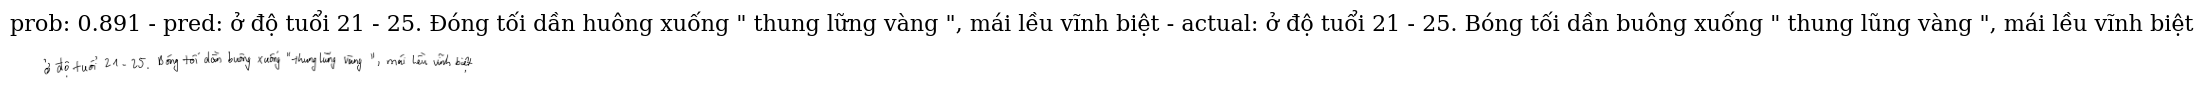

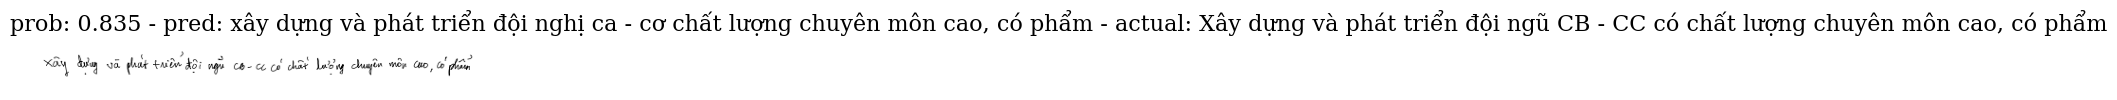

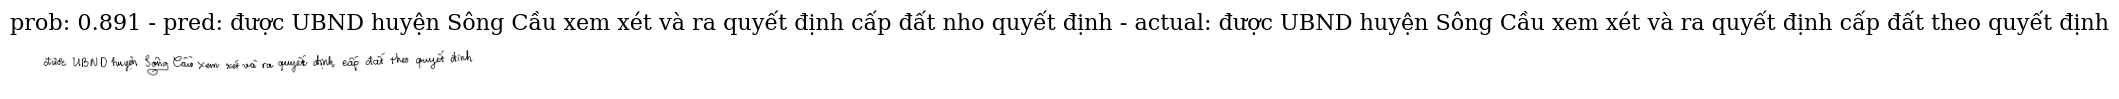

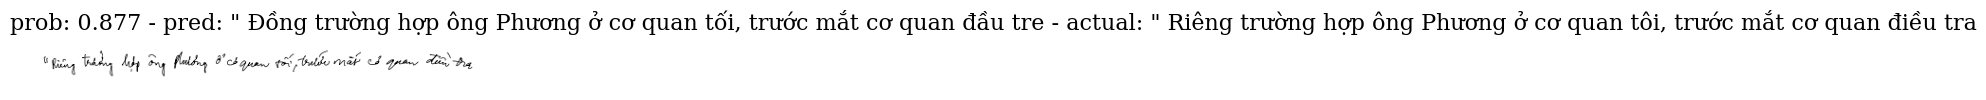

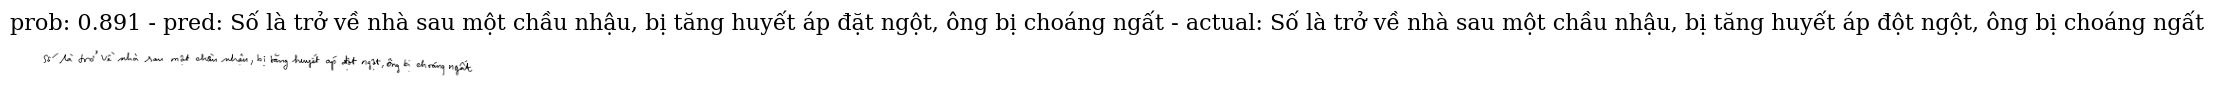

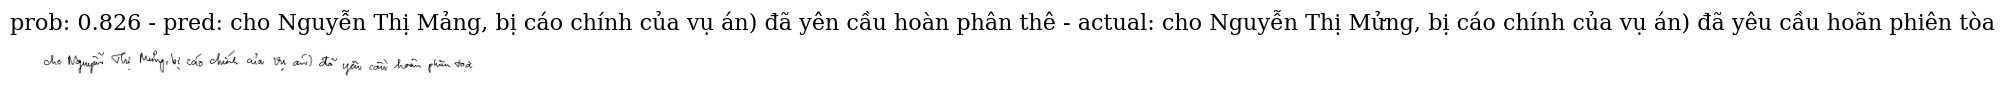

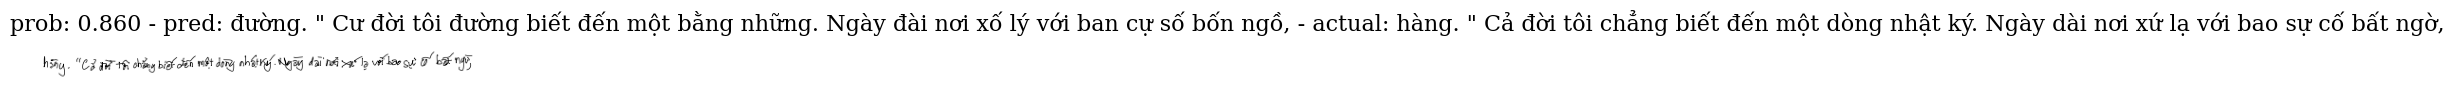

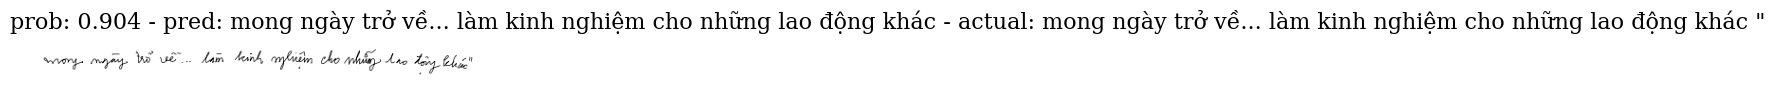

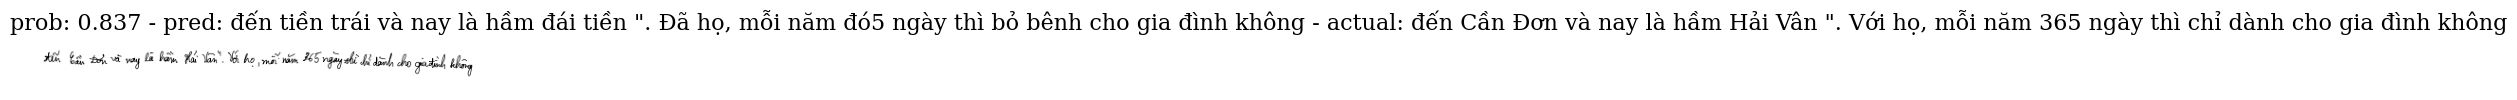

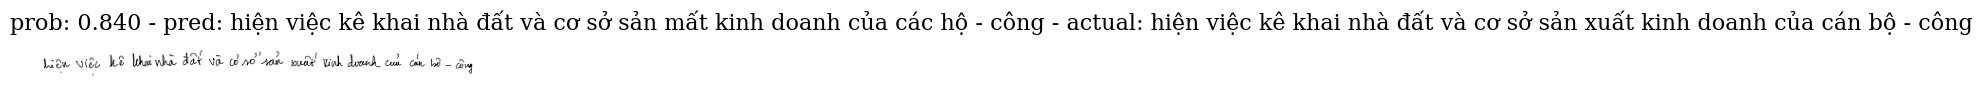

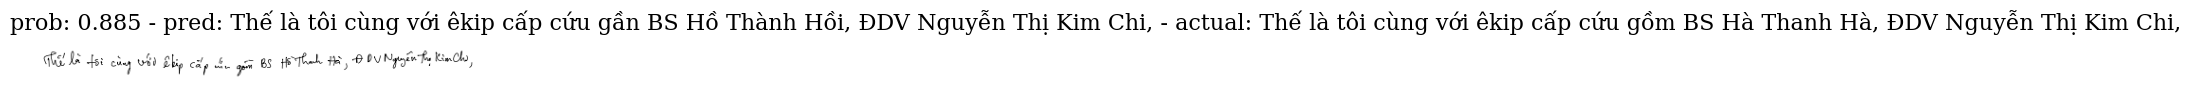

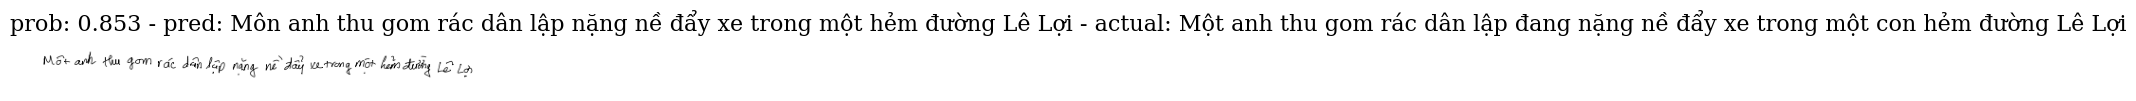

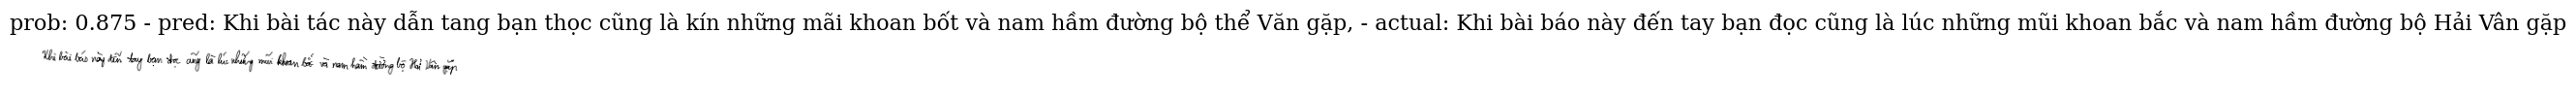

In [18]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [19]:
trainer.precision()

(0.0546875, np.float32(0.58224094))

In [20]:
trainer.config.save('config.yml')

In [25]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.4 MB/s eta 0:00:00


In [28]:
import os

weights_path = "./weights/transformerocr.pth"
if os.path.exists(weights_path):
    print("[✓] Trọng số mô hình tồn tại.")
else:
    print("[X] Trọng số mô hình không tìm thấy. Hãy kiểm tra đường dẫn!")


[✓] Trọng số mô hình tồn tại.


In [29]:
import torch
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

# Load config từ file YAML
config = Cfg.load_config_from_file('/content/config.yml')

# Chỉnh sửa đường dẫn nếu cần
config['weights'] = './weights/transformerocr.pth'
config['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'

# Khởi tạo mô hình OCR
detector = Predictor(config)

print("[✓] Mô hình OCR đã được load thành công!")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


[✓] Mô hình OCR đã được load thành công!


In [30]:
test_file = "./data_line/test_line_annotation.txt"
data_root = "./data_line/InkData_line_processed/"

test_data = []

# Đọc file annotation
with open(test_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split("\t")  # Giả sử file txt dùng tab để phân tách
        if len(parts) == 2:
            img_name, label = parts
            img_path = os.path.join(data_root, img_name)  # Đường dẫn đầy đủ
            test_data.append((img_path, label))

# Kiểm tra số lượng ảnh test
print(f"🔍 Tổng số mẫu test: {len(test_data)}")


🔍 Tổng số mẫu test: 1451


In [33]:
import os

test_file = "./data_line/test_line_annotation.txt"
data_root = "./data_line/InkData_line_processed/"  # Đúng thư mục chứa ảnh!

test_data = []
with open(test_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            img_name, label = parts

            # Chỉ ghép data_root + img_name mà không lặp thư mục
            img_path = os.path.join(data_root, os.path.basename(img_name))
            test_data.append((img_path, label))

# Kiểm tra xem ảnh có tồn tại không
for img_path, label in test_data[:5]:  # Chỉ kiểm tra 5 ảnh đầu
    if not os.path.exists(img_path):
        print(f"[X] Ảnh không tồn tại: {img_path}")
    else:
        print(f"[✓] Ảnh OK: {img_path}")


[✓] Ảnh OK: ./data_line/InkData_line_processed/20160722_0202_26749_1_tg_1_3.png
[✓] Ảnh OK: ./data_line/InkData_line_processed/20151208_0064_26558_1_tg_0_0.png
[✓] Ảnh OK: ./data_line/InkData_line_processed/20140603_0006_KQBDVN_tg_0_6.png
[✓] Ảnh OK: ./data_line/InkData_line_processed/20160517_0149_9539_2_tg_4_0.png
[✓] Ảnh OK: ./data_line/InkData_line_processed/20160604_0195_26558_2_tg_0_0.png


In [35]:
from PIL import Image

# Chạy mô hình trên tập test
preds = []
targets = []

for img_path, label in test_data:
    try:
        # Mở ảnh bằng PIL trước khi đưa vào model
        img = Image.open(img_path).convert("RGB")

        pred = detector.predict(img)  # Dự đoán từ ảnh đã mở
        preds.append(pred)
        targets.append(label)

        print(f"[✓] {img_path}: {pred} (GT: {label})")
    except Exception as e:
        print(f"[X] Lỗi đọc ảnh {img_path}: {e}")

[✓] ./data_line/InkData_line_processed/20160722_0202_26749_1_tg_1_3.png: để đều tra bỗ trung vì vụ án có dấu hiệu để lạt người, lọt tội. Cơ sở để (GT: để điều tra bổ sung vì vụ án có dấu hiệu để lọt người, lọt tội. Cơ sở để)
[✓] ./data_line/InkData_line_processed/20151208_0064_26558_1_tg_0_0.png: Hội nghị Thành ủy TP.HCM lần 16 BCH Đảng bộ TP khóa VII. Kinh đó sụt giảm, nguyên nhân từ đâu? (GT: Hội nghị Thành ủy TP.HCM lần 16 BCH Đảng bộ TP khóa VII : Kinh tế sụt giảm, nguyên nhân từ đâu?)
[✓] ./data_line/InkData_line_processed/20140603_0006_KQBDVN_tg_0_6.png: diện tiến trên 1 triệu km2 (gấp 3 diện tích đất liền : 1 triệu km2 / 330.000 (GT: diện tích trên 1 triệu km2 (gấp 3 diện tích đất liền : 1 triệu km2 / 330.000)
[✓] ./data_line/InkData_line_processed/20160517_0149_9539_2_tg_4_0.png: Có người cho tiền mua sắu hia đái để bó, vi cầu thì cho... Chú ơi, dân nghèo mút này (GT: Có người cho tiền mua sẵn bia đá để đó, ai cần thì cho... Chú ơi, dân nghèo xứ này)
[✓] ./data_line/InkData_lin

In [37]:
from jiwer import cer, wer

# Tính toán CER & WER
cer_score = cer(targets, preds)
wer_score = wer(targets, preds)

# In kết quả
print("\n Model Review")
print(f" Character precision (1 - CER): {100 * (1 - cer_score):.2f}%")
print(f" Word Error Rate (1 - WER): {100 * (1 - wer_score):.2f}%")
print(f" CER (Character Error Rate): {cer_score:.4f}")
print(f" WER (Word Error Rate): {wer_score:.4f}")


 Model Review
 Character precision (1 - CER): 90.10%
 Word Error Rate (1 - WER): 76.07%
 CER (Character Error Rate): 0.0990
 WER (Word Error Rate): 0.2393
